In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

from imblearn.over_sampling import ADASYN
# Charger le dataset iris
data = load_breast_cancer()
X_res, y_res = data.data, data.target

adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X_res, y_res)


# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser (utile pour KNN et régression logistique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Entraîner
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)  # pas besoin de scaler ici

# Tester
y_pred_tree = tree.predict(X_test)




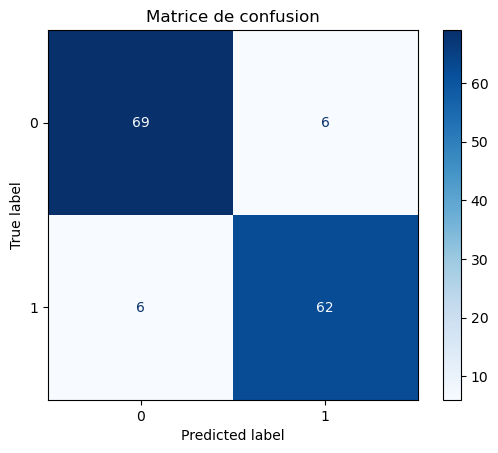

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Après avoir fait y_pred avec votre modèle
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Exemple pour y_test et y_pred

print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("Precision :", precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall :", recall_score(y_test, y_pred_tree, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred_tree, average='weighted'))


Accuracy : 0.916083916083916
Precision : 0.916083916083916
Recall : 0.916083916083916
F1-score : 0.916083916083916


In [5]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 16))  # Essaye même 30, 20 si nécessaire
plot_tree(tree.predict, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Arbre de décision pour la régression du prix des maisons", fontsize=16)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 2400x1600 with 0 Axes>